In [58]:
import xlrd
import pylab as pylab
import numpy as np
from matplotlib.mlab import griddata
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.interpolate
%matplotlib inline 

In [59]:
def getMatrix(archivo,paso):
    workbook= xlrd.open_workbook(archivo)
    #workbook= xlrd.open_workbook('Toma4_reducido.xlsx')
    sheet_names=workbook.sheet_names()
    print sheet_names
    toma_sheet=workbook.sheet_by_name(sheet_names[0])
    promedio_sheet=workbook.sheet_by_name(sheet_names[1])
    suma_sheet=workbook.sheet_by_name(sheet_names[2])
    x_promedio=promedio_sheet.col_values(0)
    y_promedio=promedio_sheet.col_values(1)
    canalB_promedio=promedio_sheet.col_values(7)
    print x_promedio[0]
    print y_promedio[0]
    print canalB_promedio[0]
    #CLeaning list
    del x_promedio[0]
    del y_promedio[0]
    del canalB_promedio[0]
    #arrays
    x=np.asarray(x_promedio)
    y=np.asarray(y_promedio)
    z=np.asarray(canalB_promedio)
    #fig, (ax,bx) = plt.subplots(1,2)
    minv,maxv=-2,2
    z_aux=z
    rows=[]
    ind2remove = [0,1,2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
    aux=0
    rangofloat=(10/(paso*10))*4+1
    rango=int(rangofloat)
    print rango
    ind2remove=np.linspace(0,rango-1,rango)
    for i in range(rango):
        #print z_aux
        if aux==0:
            row=z_aux[0:rango]
            #print row
            rows.append(row)
            z_aux=np.delete(z_aux,ind2remove)
            aux=1
        else:
            
            row=z_aux[0:rango]
            rowp=row[::-1]
            #print rowp
            rows.append(rowp)
            z_aux=np.delete(z_aux,ind2remove)
            aux=0
        
    
    print len(rows)
  
    matrix=np.matrix(rows)
    return matrix , rango

In [60]:
def getMatrixGhost(archivo,paso):
    workbook= xlrd.open_workbook(archivo)
    #workbook= xlrd.open_workbook('Toma4_reducido.xlsx')
    sheet_names=workbook.sheet_names()
    print sheet_names
    toma_sheet=workbook.sheet_by_name(sheet_names[0])
    promedio_sheet=workbook.sheet_by_name(sheet_names[1])
    suma_sheet=workbook.sheet_by_name(sheet_names[2])
    x_promedio=promedio_sheet.col_values(0)
    y_promedio=promedio_sheet.col_values(1)
    canalA_promedio=promedio_sheet.col_values(6)
    print x_promedio[0]
    print y_promedio[0]
    print canalA_promedio[0]
    #CLeaning list
    del x_promedio[0]
    del y_promedio[0]
    del canalA_promedio[0]
    #arrays
    x=np.asarray(x_promedio)
    y=np.asarray(y_promedio)
    z=np.asarray(canalA_promedio)
    #fig, (ax,bx) = plt.subplots(1,2)
    minv,maxv=-2,2
    z_aux=z
    rows=[]
    #ind2remove = [0,1,2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
    aux=0
    rangofloat=(10/(paso*10))*4+1
    rango=int(rangofloat)
    ind2remove=np.linspace(0,rango-1,rango)
    print rango
    for i in range(rango):
        #print z_aux
        if aux==0:
            row=z_aux[0:rango]
            #print row
            rows.append(row)
            z_aux=np.delete(z_aux,ind2remove)
            aux=1
        else:
            
            row=z_aux[0:rango]
            rowp=row[::-1]
            #print rowp
            rows.append(rowp)
            z_aux=np.delete(z_aux,ind2remove)
            aux=0
        
    
    print len(rows)
  
    matrix=np.matrix(rows)
    return matrix, rango

In [128]:
def graficar1(matrix,rango,titulo):
    
    plt.matshow(matrix)
    plt.colorbar()
    ran=(rango-1)/4
    print ran
    x=np.linspace(0,rango-1,ran-1)
    labels=np.linspace(-2,2,ran-1)
    print x
    print plt.xticks()
    plt.xticks(x,labels)
    plt.yticks(x,labels)
    print plt.xticks()
    plt.title(titulo)
    plt.xlabel('y')
#plt.xlim(-2,2)
    plt.ylabel('x')
#plt.ylim(-2,2)


#plt.xticks(labels)
    plt.show()
def graficar2(matrix,rango,titulo):
    
    plt.matshow(matrix)
    plt.colorbar()
    ran=(rango-1)/4
    #print ran
    x=np.linspace(0,rango-1,ran)
    labels=np.linspace(-2,2,ran)
    #print x
    #print plt.xticks()
    plt.xticks(x,labels)
    plt.yticks(x,labels)
    print plt.xticks()
    plt.title(titulo)
    plt.xlabel('y')
#plt.xlim(-2,2)
    plt.ylabel('x')
#plt.ylim(-2,2)


#plt.xticks(labels)
    plt.show()

def graficar(m,ran,nom):
    if ran==41:
        graficar1(m,ran,nom)
    else:
        graficar2(m,ran,nom)

[u'Ghost_DetAV_DetCH_reducido (roo', u'promedio', u'suma']
Eje x
Eje y
Canal B
41
41
10
[  0.   5.  10.  15.  20.  25.  30.  35.  40.]
(array([ -5.,   0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.]), <a list of 11 Text xticklabel objects>)
(array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.]), <a list of 9 Text xticklabel objects>)


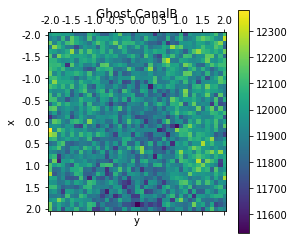

In [129]:
matrix,rango=getMatrix('Ghost_DetAV_DetCH_reducido.xlsx',0.1)
graficar(matrix,rango,'Ghost CanalB')


[u'Toma4_reducido (root)', u'promedio', u'suma']
Eje x
Eje y
Canal B
21
21
(array([  0.,   5.,  10.,  15.,  20.]), <a list of 5 Text xticklabel objects>)


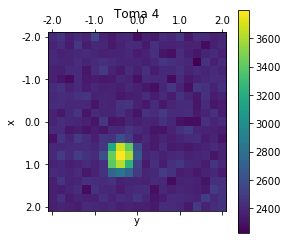

In [130]:
m,rango = getMatrix('Toma4_reducido.xlsx',0.2)
graficar(m,rango,'Toma 4')

[u'Ghost_DetAV_DetCH_reducido (roo', u'promedio', u'suma']
Eje x
Eje y
Canal B
41
41
10
[  0.   5.  10.  15.  20.  25.  30.  35.  40.]
(array([ -5.,   0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.]), <a list of 11 Text xticklabel objects>)
(array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.]), <a list of 9 Text xticklabel objects>)


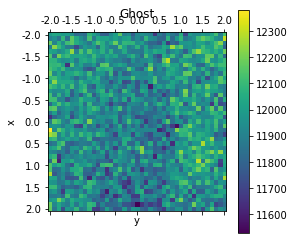

In [131]:
matrix,rango=getMatrix('Ghost_DetAV_DetCH_reducido.xlsx',0.1)
graficar(matrix,rango,'Ghost')

[u'Ghost_DetAV_DetCH_reducido (roo', u'promedio', u'suma']
Eje x
Eje y
Canal A
41
41
10
[  0.   5.  10.  15.  20.  25.  30.  35.  40.]
(array([ -5.,   0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.]), <a list of 11 Text xticklabel objects>)
(array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.]), <a list of 9 Text xticklabel objects>)


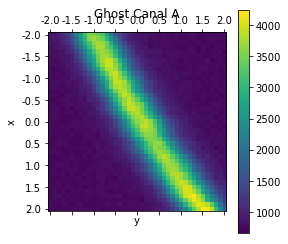

In [132]:
matrix,rango=getMatrixGhost('Ghost_DetAV_DetCH_reducido.xlsx',0.1)
graficar(matrix,rango,'Ghost Canal A')

In [2]:
workbook= xlrd.open_workbook('Toma4_reducido.xlsx')
sheet_names=workbook.sheet_names()
print sheet_names
toma_sheet=workbook.sheet_by_name(sheet_names[0])
promedio_sheet=workbook.sheet_by_name(sheet_names[1])
suma_sheet=workbook.sheet_by_name(sheet_names[2])
x_promedio=promedio_sheet.col_values(0)
y_promedio=promedio_sheet.col_values(1)
canalB_promedio=promedio_sheet.col_values(7)
print x_promedio[0]
print y_promedio[0]
print canalB_promedio[0]
#CLeaning list
del x_promedio[0]
del y_promedio[0]
del canalB_promedio[0]
#arrays
x=np.asarray(x_promedio)
y=np.asarray(y_promedio)
z=np.asarray(canalB_promedio)

[u'Toma4_reducido (root)', u'promedio', u'suma']
Eje x
Eje y
Canal B


21
(array([ 0,  5, 10, 15, 20]), <a list of 5 Text xticklabel objects>)
(array([ 0,  5, 10, 15, 20]), <a list of 5 Text yticklabel objects>)


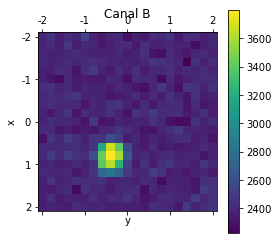

In [16]:
#fig, (ax,bx) = plt.subplots(1,2)
minv,maxv=-2,2
z_aux=z
rows=[]
ind2remove = [0,1,2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
aux=0
for i in range(21):
    #print z_aux
    if aux==0:
        row=z_aux[0:21]
        #print row
        rows.append(row)
        z_aux=np.delete(z_aux,ind2remove)
        aux=1
    else:
        
        row=z_aux[0:21]
        rowp=row[::-1]
        #print rowp
        rows.append(rowp)
        z_aux=np.delete(z_aux,ind2remove)
        aux=0
        
    
print len(rows)
  
matrix=np.matrix(rows)
#bx.imshow(matrix, interpolation='nearest')
plt.matshow(matrix)
plt.colorbar()
x=[0,5,10,15,20]
labels=['-2','-1','0','1','2']
plt.xticks(x,labels)
plt.yticks(x,labels)
plt.title('Canal B')
plt.xlabel('y')
#plt.xlim(-2,2)
plt.ylabel('x')
#plt.ylim(-2,2)

print plt.xticks()
print plt.yticks()
#plt.xticks(labels)
plt.show()




In [43]:
print np.linspace(0,20,21)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.]
